<a href="https://colab.research.google.com/github/PoornaManujaya/Machine-Learning-Begginer-/blob/main/Iris_Flowers_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This project is for claasification of Iris Flowers

# import important libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

# NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines etc.
# Pandas is a fast, powerful, flexible and easy to use library for data analysis and manipulation.
# Matplotlib is a comprehensive library for creating static, animated and interactive visualizations.
# Seaborn is a data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
# The command %matplotlib inline allows the plots to be visualized directly inside the python notebook we are coding on.

# Load data

In [2]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv' 
col_name =['sepal-length', 'sepal-width', 'petal-length', 'petal-width','class']
dataset = pd.read_csv(url,names = col_name)

# Explore the description of the data

In [3]:
dataset.head()      # shows first 5 lines of the dataset

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()      # gives the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
dataset.describe()  # gives the statical summary of the dataset

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset['class'].value_counts() # shows us the number of examples in each class.

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [7]:
dataset.shape #gives the shape of the dataset

(150, 5)

# Violin Plots
Sometimes, the summary statistics such as mean, standard deviation and median are not enough to understand a dataset. Are the values clustered around the median? Are they spread out normally or skewed to one side? A violin plot can help you to answer these questions. This can show you peaks of the data and visualizes the distribution of the dataset.

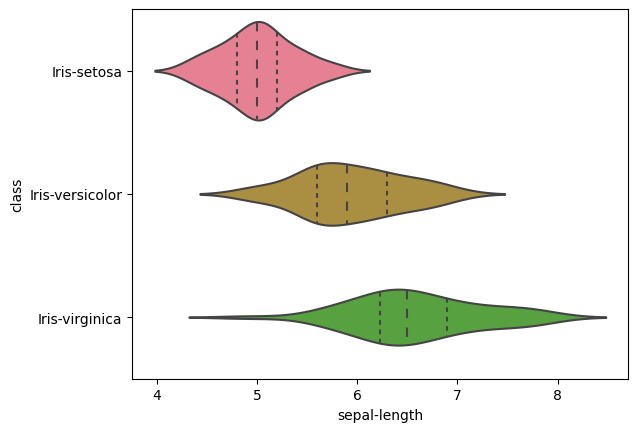

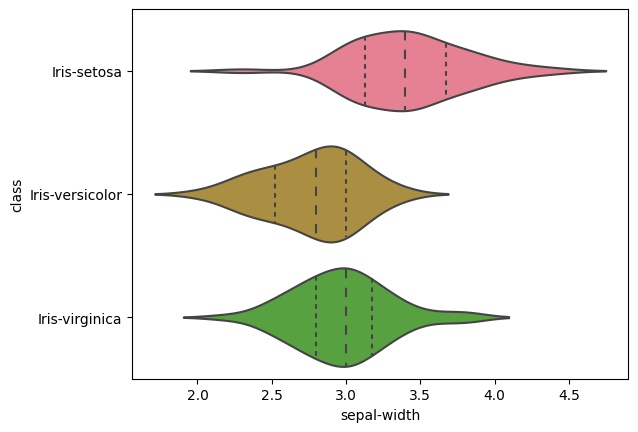

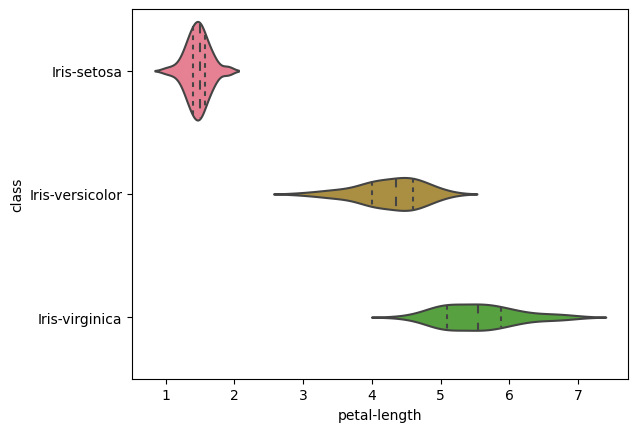

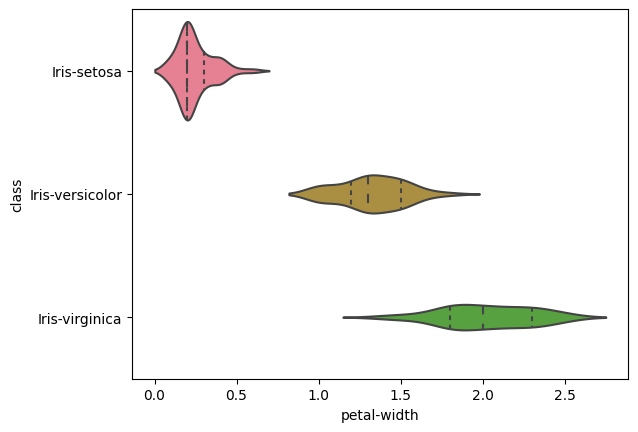

In [8]:
sns.violinplot(y='class', x='sepal-length', data=dataset, inner='quartile')
plt.show()

sns.violinplot(y='class', x='sepal-width', data=dataset, inner='quartile')
plt.show()

sns.violinplot(y='class', x='petal-length', data=dataset, inner='quartile')
plt.show()

sns.violinplot(y='class', x='petal-width', data=dataset, inner='quartile')
plt.show()

# Correlation Heatmap
Correlation between two attributes tells you about the interdependency between the two attributes. A correlation heatmap shows a 2D visualization of such interdependencies between each pair of attributes. Whether two attributes are highly correlated or not is reflected by the colors of the heatmap.

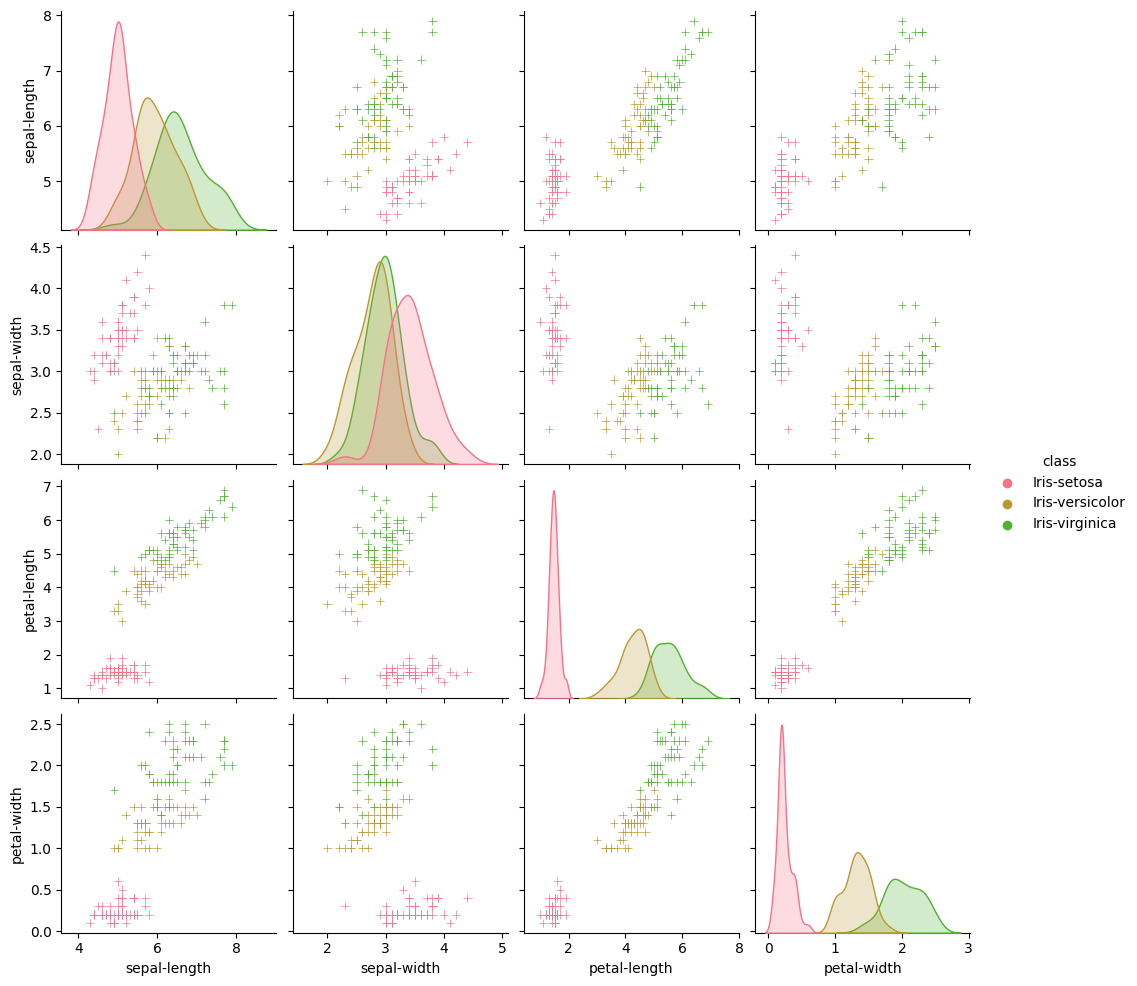

In [9]:
sns.pairplot(dataset, hue='class', markers='+')
plt.show()

# Correlation Heatmap

In the first line we specify the size of the figure, in inches. In this case the width is 7 inches and the height is 5 inches. Then we call the heatmap function of Seaborn, to which we pass the correlation matrix of the attributes of the dataset. The calculation of the correlation matrix is achieved by calling the corr() function on the dataset. The cmap variable sets the type of color map we would like to see on the heatmap. Here we have specified cmap=’cubehelix_r’. Have a look at the documentation of the Seaborn library to find out the other kinds of color maps that are available for producing a colorful correlation heatmap.

<ipython-input-10-e820336134a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='jet')


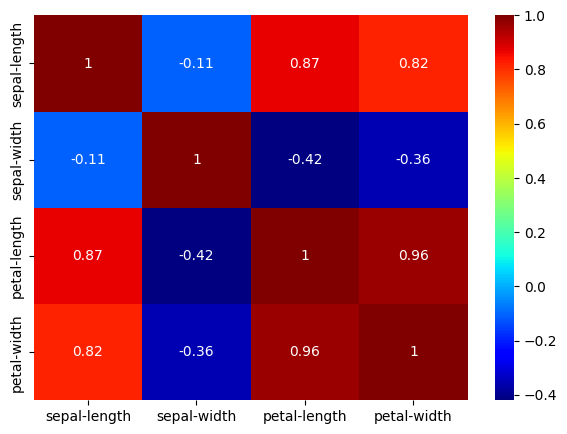

In [10]:
plt.figure(figsize =(7,5))
sns.heatmap(dataset.corr(), annot=True, cmap='jet')
plt.show()

# Split Data

In [12]:
X = dataset.drop(['class'], axis = 1)
y = dataset['class']
print(f'X shape: {X.shape} | y shape: {y.shape}')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=1)

X shape: (150, 4) | y shape: (150,)


# Train Classifier

In [13]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

# Evaluvating Classifier
In this code we are first asking the model that we created named svn to do the predictions (classifications) for us for the X_test set and create predictions object. Then we are asking the results (predictions) to be evaluated aginast the correct answers we had in the original dataset in y_test.

In [16]:
# Model evaluation
# Predict from the test dataset
predictions = svn.predict(X_test)
# calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score (y_test, predictions)

0.9666666666666667

# Detailed Evaluation

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



# Error Analysis with the Confusion Matrix

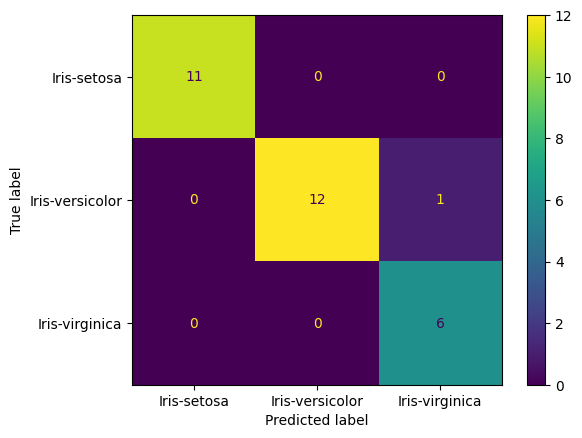

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(y_test, predictions, labels=svn.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svn.classes_)
disp.plot()
plt.show()

# Save and Load Model
The pickle module is used to serialize/deserialize a python object structure so that it can be saved as a binary and loaded and used later. In this example, Serialize means converting the model to a form that can be stored in a storage media, and Deserializing is the process of reading the model from storage and putting it into a form that can be executed in the Python environment that it was built. This is similar to writing a file and reading it later.

In [19]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

In [21]:
# Loading and Using a Saved Model to Classify New Data
with open('SVM.pickle', 'rb') as f: 
     model = pickle.load(f) 
model.predict(X_test)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)